# Towards understanding the Stochastic Variational Inference paper

I think I have spotted a bug in the derivation of the objective. Here I argue that the objective is missing the term: 

$$
\mathbb{E}_{q}[ln(h(\beta))]
$$

This term depends on the variational parameter $\lambda$. To see this, consider the case where $q(\beta|\lambda)$ is a [gaussian distribution with known variance](https://en.wikipedia.org/wiki/Exponential_family#Normal_distribution:_unknown_mean,_known_variance). Hence, the term $\lambda$ is stand-in for $\mu$, the mean. 

The expectation term above expands out to the following:

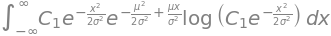

In [1]:
from sympy import *
init_printing()

var('sigma C1 C2 C3 C4 C5 mu x')
delta = Function('delta')

h_ = exp(- (x ** 2) / (2 * sigma ** 2))
h = C1 * h_
t = x / sigma
a = mu ** 2 / (2 * sigma ** 2)
n = mu / sigma

I = h * log(h) * exp(n * t - a)
Integral(I, (x, -oo, oo))

I rewrite this integral in simpler terms, arbitrarily labelling constants that don't depend on $\mu$.

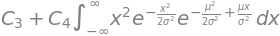

In [2]:
expr = C3 + C4 * Integral(h_ * exp(n * t - a) * (x ** 2), (x, -oo, oo))
expr

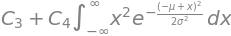

In [3]:
expr = C3 + C4 * Integral(x ** 2 * exp(-(x - mu) ** 2 / (2 * sigma ** 2)), (x, -oo, oo))
expr

Now, notice that that the choice of $\sigma$ is up to us in order to construct an example where the expectation term depends on $\mu$. In particular, we can use a very small value for $\sigma$ such that the function:

$$
e^{-\frac{(x - \mu)^2}{2 \sigma^2}} \approx \delta(x - \mu)
$$

Where $\delta(x - \mu)$ is proportional to the [Dirac-Delta Function](https://en.wikipedia.org/wiki/Dirac_delta_function). In this case, our expression becomes 

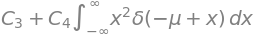

In [4]:
C3 + C4 * Integral(x ** 2 * delta(x - mu), (x, -oo, oo))

This simplifies to

In [5]:
C3 + C4 * mu ** 2

Thus illustrating that it's not necessary that the term is constant with respect to the variational parameter.